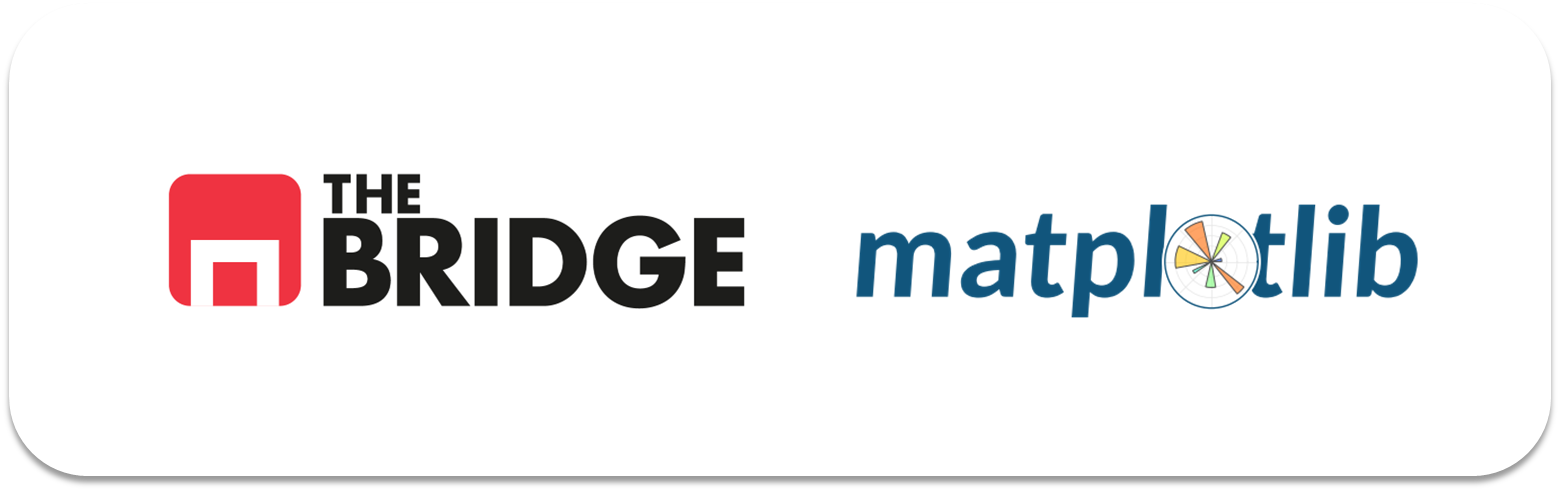

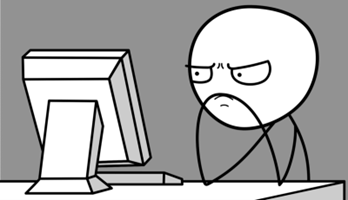

Para ejercitarte y afianzar lo aprendido sobre gráficas de Matplotlib, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Ejercicio 1


Carga tu querido dataset del titanic, en la ruta "./data/titanic.csv", no hace falta que hagas limpieza.

In [3]:
df_titanic = pd.read_csv('./data/titanic.csv')

In [5]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Ejercicio 2



Crea el histograma de la variable `age` de forma que se reproduzca la siguiente figura (tiene 30 bines)

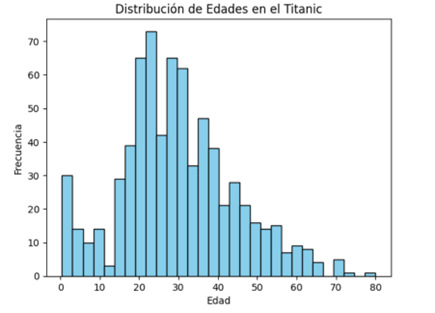

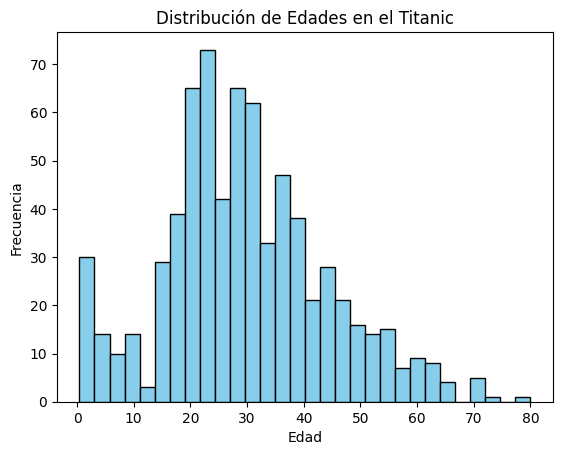

In [10]:
fig = plt.figure()
plt.hist(df_titanic.age, bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('Distribución de Edades en el Titanic')
plt.ylabel('Frecuencia')
plt.xlabel('Edad');


### Ejercicio 3

¿Cuáles son los 3 intervalos de valores con mayor número de viajeros según el gráfico anterior? ¿Obtén también el número de viajeros en cada uno?

+ de 20 a 24
+ de 25 a 29
+ de 30 a 34

In [37]:
df_titanic.loc[(df_titanic['age'] >=20) & (df_titanic['age'] <= 34), 'age']
df_edad = df_titanic.copy()

bins = [20, 24, 29, 34]
labels = ['20-24', '25-29', '30-34']
df_edad['grupos'] = pd.cut(df_edad['age'], bins = bins, labels = labels, right=True)
df_edad['grupos'].value_counts()

grupos
25-29    107
20-24     98
30-34     94
Name: count, dtype: int64

### Ejercicio 4

Obten el diagrama de caja del precio del billete usando las funciones de matplotlib y reproduciendo la siguiente figura (tendrás que bucear un poco en los parámetros, y usar patch_artist = True, el tamaño de los bigotes está ajustado a 3 IQRs):

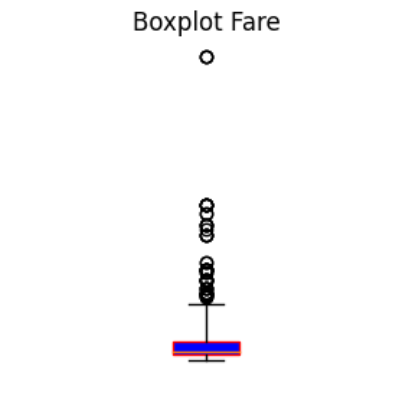

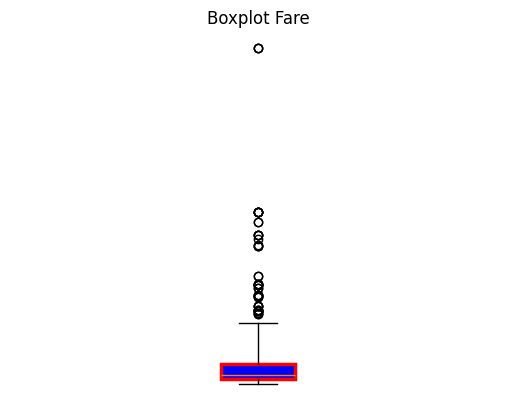

In [57]:
plt.boxplot(df_titanic.fare, patch_artist = True, whis = 3, boxprops=dict(linewidth=2.5, facecolor = 'blue', color='red'))
plt.axis('off')
plt.title('Boxplot Fare');

### Ejercicio 5

Crea el gráfico de frecuencias absolutas y relativas de las ciudades de embarque del Titanic de forma que repodruzcan la siguiente figura:

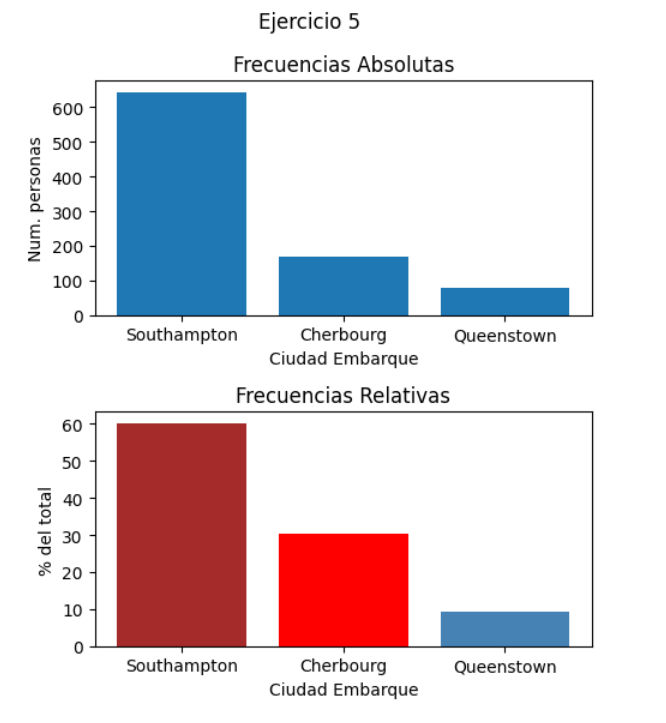

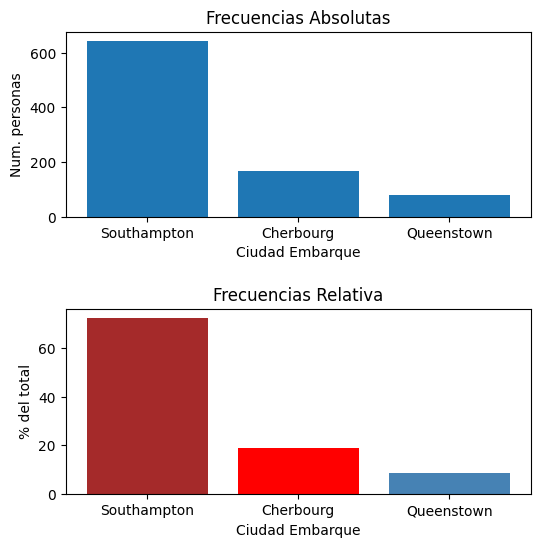

In [91]:
fig, ax = plt.subplots(2,1, figsize = (6,6))
fig.subplots_adjust(hspace=0.5)
categorias = df_titanic.embark_town.value_counts().index.to_list()
absoluta = df_titanic.embark_town.value_counts().to_list()
relativa = (df_titanic.embark_town.value_counts(normalize=True)*100).to_list()

ax[0].bar(categorias, absoluta)
ax[0].set_title('Frecuencias Absolutas')
ax[0].set_ylabel('Num. personas')
ax[0].set_xlabel('Ciudad Embarque')

ax[1].bar(categorias, relativa, color = ['brown', 'red', 'steelblue'])
ax[1].set_title('Frecuencias Relativa')
ax[1].set_ylabel('% del total')
ax[1].set_xlabel('Ciudad Embarque');

### Ejercicio 6

Crea el gráfico de dispersión entre el precio y la edad, de forma que reproduzca el siguiente gráfico (tendrás que emplear el argumento alpha)

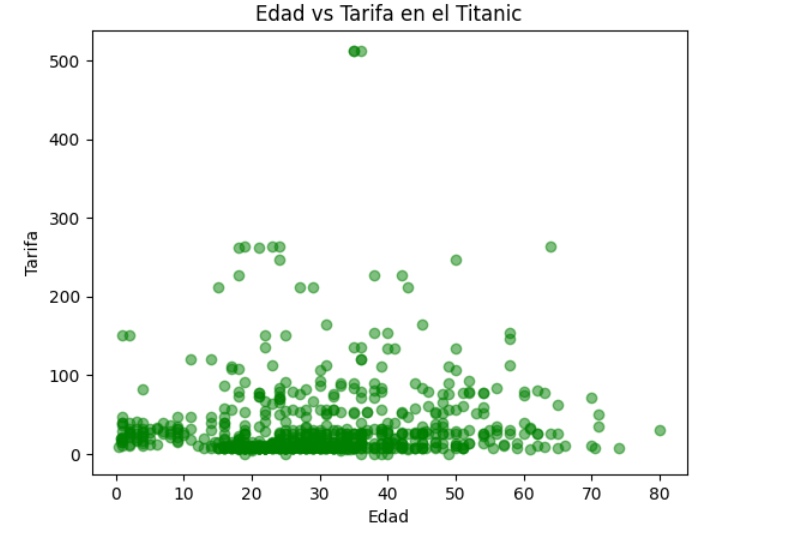

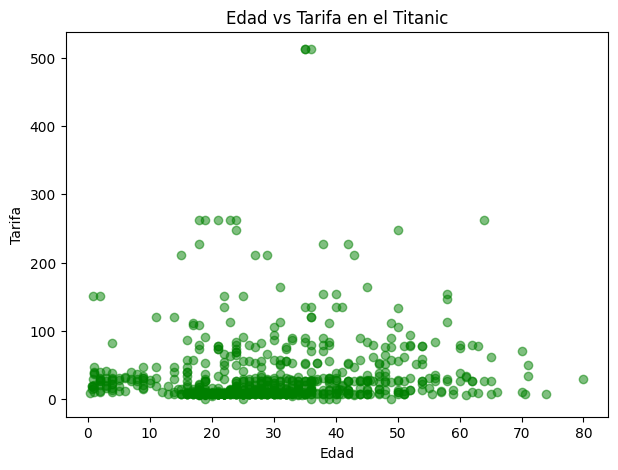

In [99]:
fig = plt.figure(figsize = (7,5))
plt.scatter(df_titanic['age'], df_titanic['fare'], alpha = 0.5, color = 'green')
plt.title('Edad vs Tarifa en el Titanic')
plt.ylabel('Tarifa')
plt.xlabel('Edad')
plt.show()

### Ejercicio 7

Vamos a obtener el precio medio por edad, de la siguiente forma agrupa por edad y calcula la media de la tarifa, luego haz lo mismo pero calculando la desviación de estándar. Guarda los resultados en dos variables distintas.

In [100]:
media_edad = df_titanic.groupby('age')['fare'].mean()
desviacion_edad = df_titanic.groupby('age')['fare'].std()

### Ejercicio 8

Considerando las medias como un conjunto de medidas y las desviaciones como el error de las mismas construye un diagrama de errores que reproduzca la siguiente figura, usando (£) como moneda:

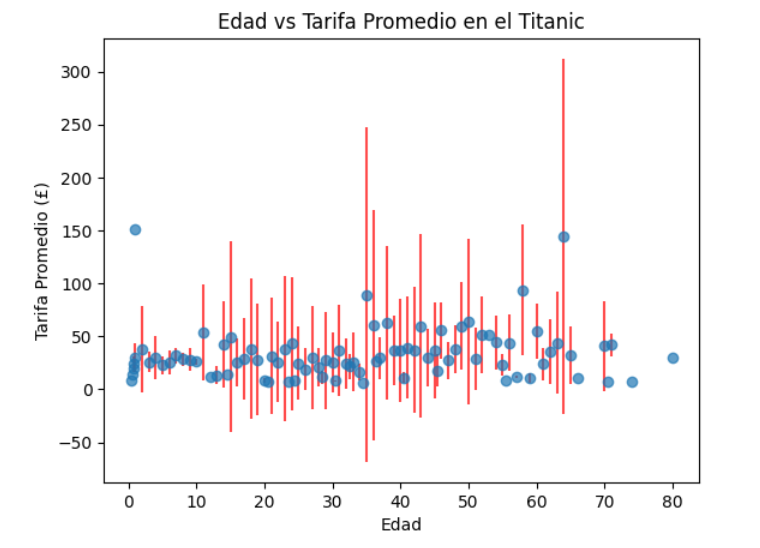

C:\Users\pacoi\AppData\Local\Temp\ipykernel_15688\2866519339.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".g" (-> color='g'). The keyword argument will take precedence.
  plt.errorbar(media_edad.index, media_edad, yerr = desviacion_edad, fmt = '.g', color = 'blue', ecolor = 'red', markersize = 10, alpha = 0.4)


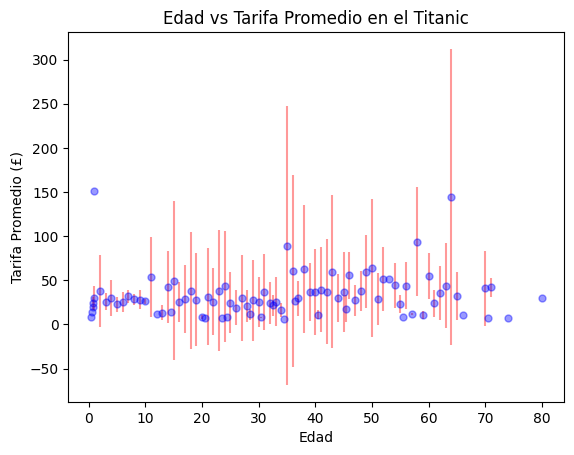

In [133]:
fig = plt.figure() #como tenemos un groupby usamos la misma variable para x e y, index representa las edades y lo otro representa su respectiva media de precio
plt.errorbar(media_edad.index, media_edad, yerr = desviacion_edad, fmt = '.g', color = 'blue', ecolor = 'red', markersize = 10, alpha = 0.4)
plt.title('Edad vs Tarifa Promedio en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Tarifa Promedio (£)')
plt.show()

EXTRA: Pinta los cuatro primeros gráficos conjuntamente en una sóla figura como la que ves a continuación:

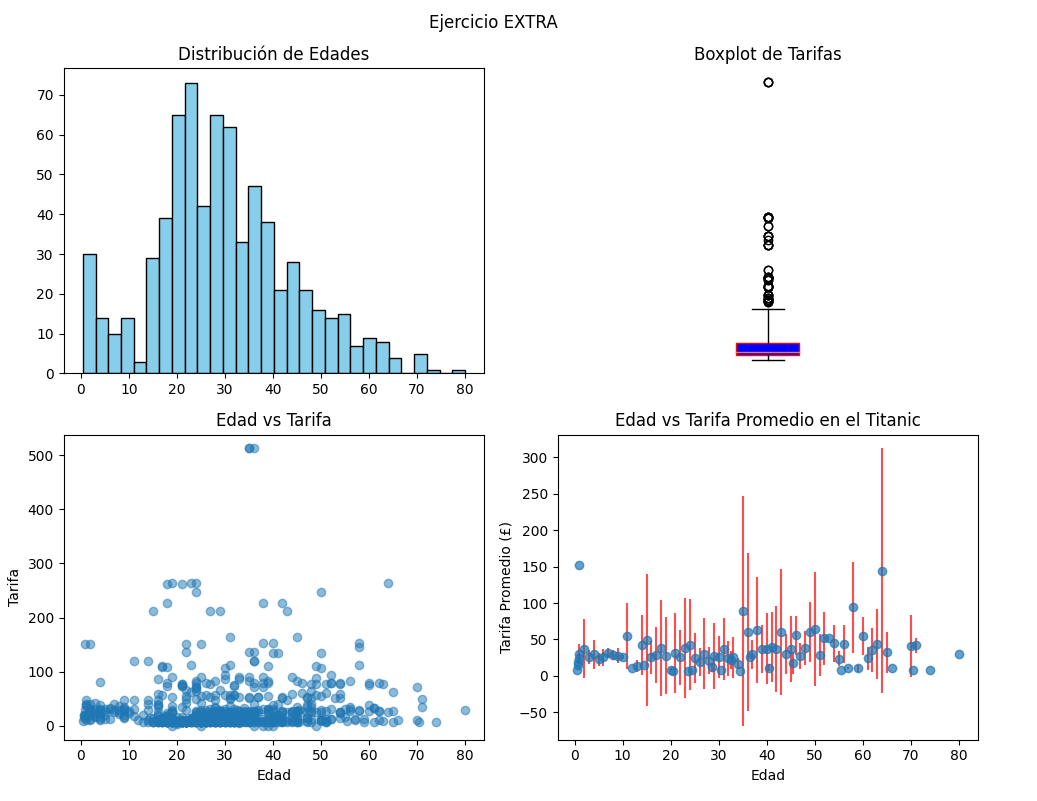

C:\Users\pacoi\AppData\Local\Temp\ipykernel_15688\21814347.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".g" (-> color='g'). The keyword argument will take precedence.
  ax[1,1].errorbar(media_edad.index, media_edad, yerr = desviacion_edad, fmt = '.g', color = 'blue', ecolor = 'red', markersize = 10, alpha = 0.4)


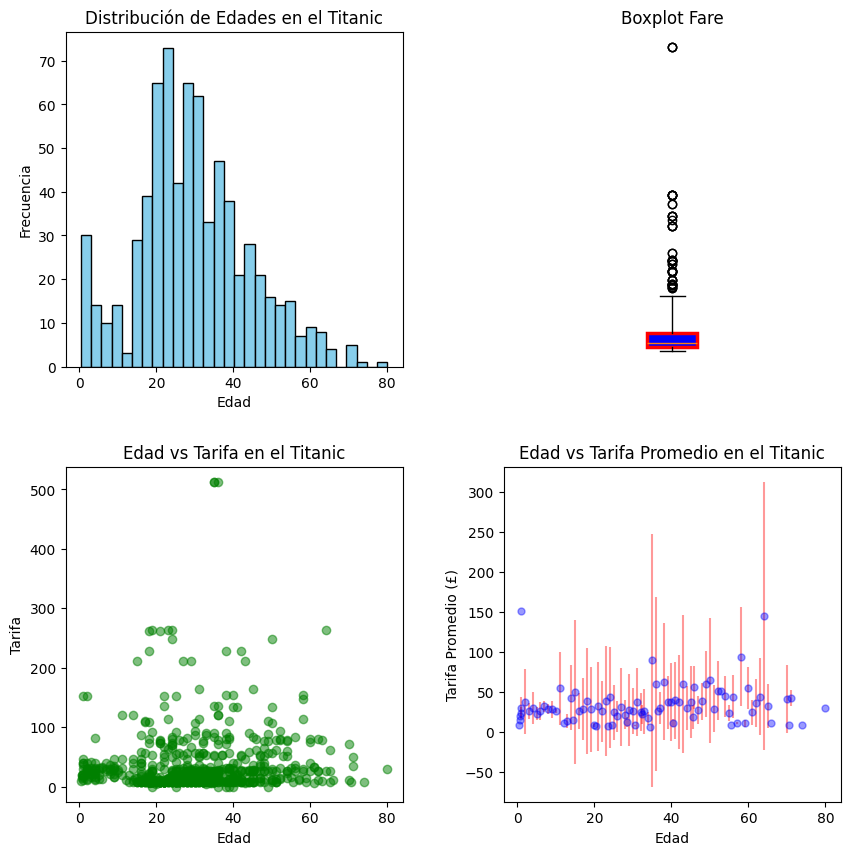

In [139]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0.3)

ax[0,0].hist(df_titanic.age, bins = 30, color = 'skyblue', edgecolor = 'black')
ax[0,0].set_title('Distribución de Edades en el Titanic')
ax[0,0].set_ylabel('Frecuencia')
ax[0,0].set_xlabel('Edad')

ax[0,1].boxplot(df_titanic.fare, patch_artist = True, whis = 3, boxprops=dict(linewidth=2.5, facecolor = 'blue', color='red'))
ax[0,1].set_axis_off()
ax[0,1].set_title('Boxplot Fare')

ax[1,0].scatter(df_titanic['age'], df_titanic['fare'], alpha = 0.5, color = 'green')
ax[1,0].set_title('Edad vs Tarifa en el Titanic')
ax[1,0].set_ylabel('Tarifa')
ax[1,0].set_xlabel('Edad')

ax[1,1].errorbar(media_edad.index, media_edad, yerr = desviacion_edad, fmt = '.g', color = 'blue', ecolor = 'red', markersize = 10, alpha = 0.4)
ax[1,1].set_title('Edad vs Tarifa Promedio en el Titanic')
ax[1,1].set_xlabel('Edad')
ax[1,1].set_ylabel('Tarifa Promedio (£)')

plt.show()